In [2]:
import numpy as np
import pandas as pd

In [4]:
asteroid1 = pd.read_csv('../../TestData/cleaned_asteroid_data.csv')

asteroid1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958519 entries, 0 to 958518
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   neo     958519 non-null  int64  
 1   pha     958519 non-null  int64  
 2   H       958519 non-null  float64
 3   e       958519 non-null  float64
 4   a       958519 non-null  float64
 5   q       958519 non-null  float64
 6   i       958519 non-null  float64
 7   om      958519 non-null  float64
 8   w       958519 non-null  float64
 9   ma      958519 non-null  float64
 10  ad      958519 non-null  float64
 11  n       958519 non-null  float64
 12  tp      958519 non-null  float64
 13  per     958519 non-null  float64
 14  per_y   958519 non-null  float64
 15  moid    958519 non-null  float64
 16  class   958519 non-null  object 
 17  rms     958519 non-null  float64
dtypes: float64(15), int64(2), object(1)
memory usage: 131.6+ MB


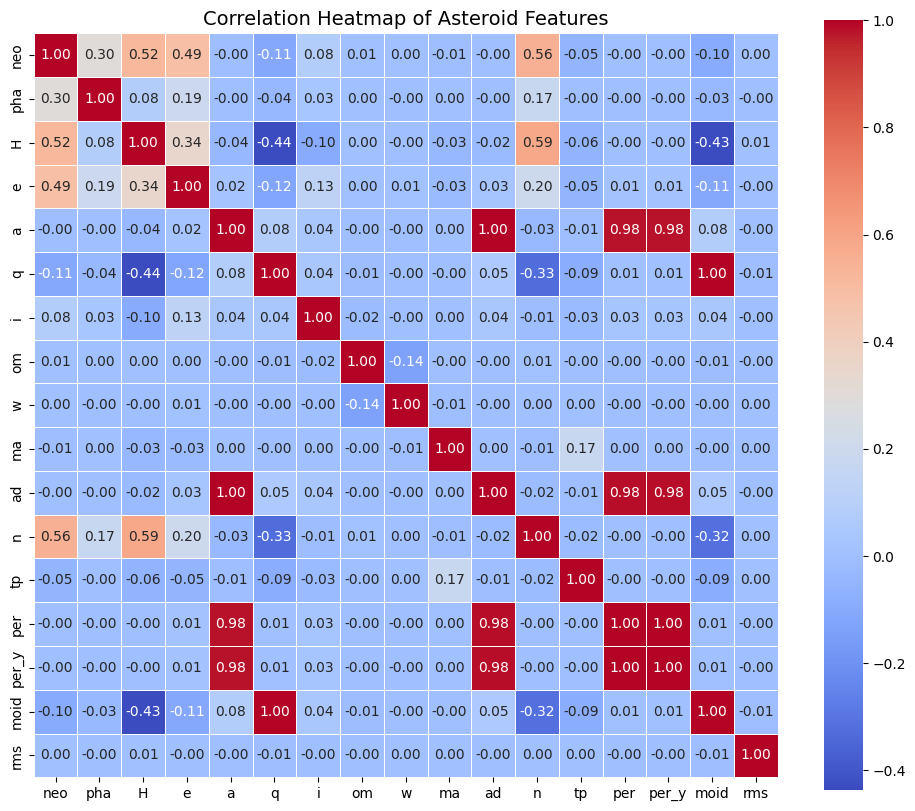

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_df = asteroid1.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Asteroid Features", fontsize=14)
plt.show()


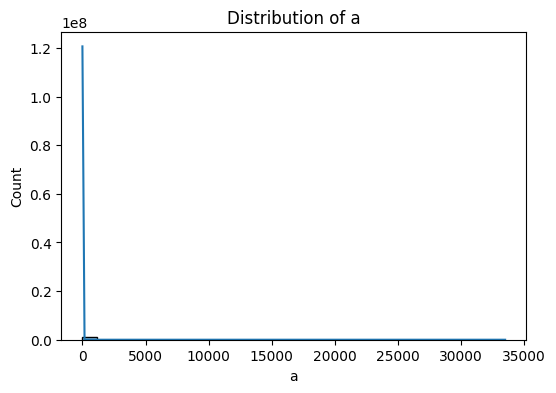

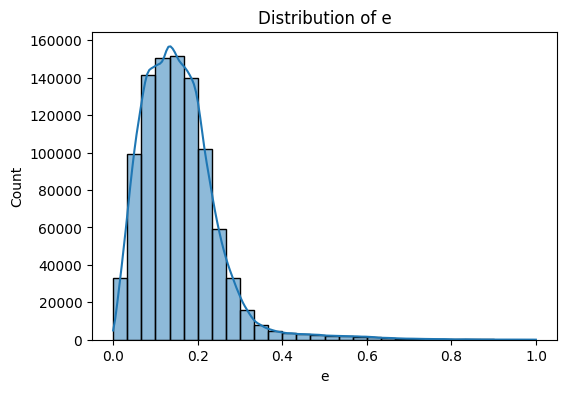

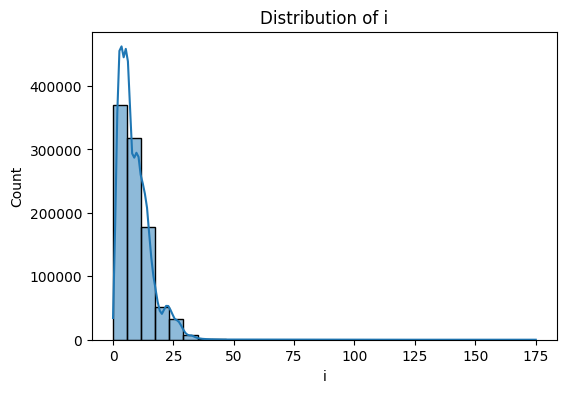

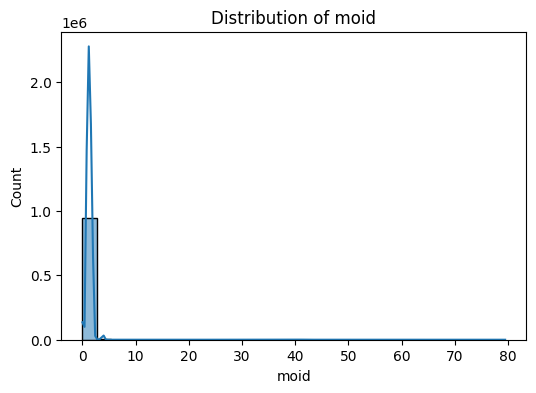

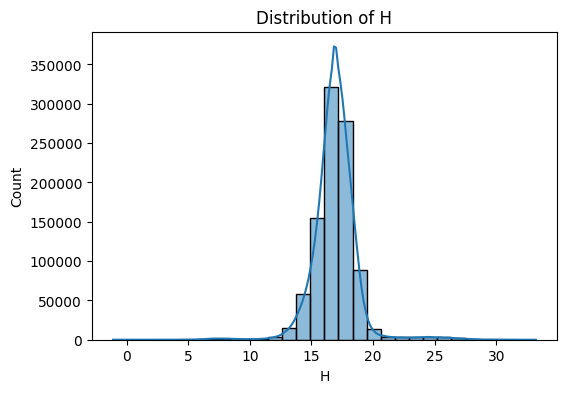

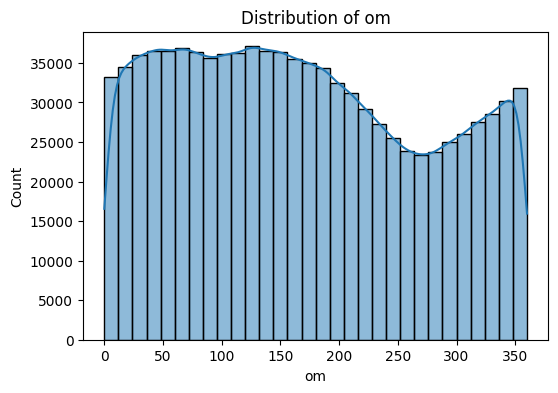

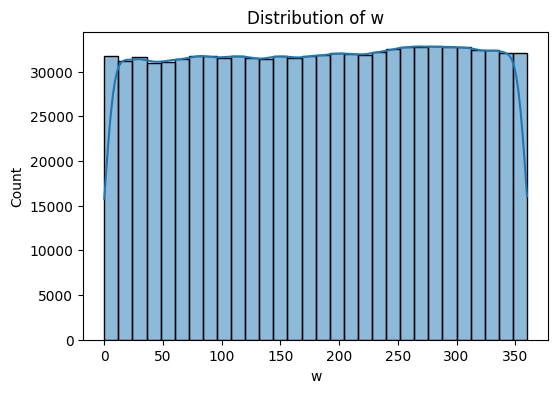

In [6]:
features = ['a', 'e', 'i', 'moid', 'H', 'om', 'w']


for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(asteroid1[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

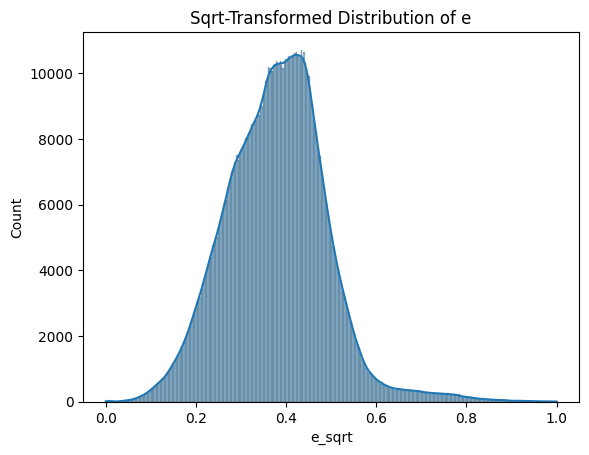

In [7]:
asteroid1['e_sqrt'] = np.sqrt(asteroid1['e'])
sns.histplot(asteroid1['e_sqrt'], kde=True)
plt.title("Sqrt-Transformed Distribution of e")
plt.show()

In [8]:
asteroid1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958519 entries, 0 to 958518
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   neo     958519 non-null  int64  
 1   pha     958519 non-null  int64  
 2   H       958519 non-null  float64
 3   e       958519 non-null  float64
 4   a       958519 non-null  float64
 5   q       958519 non-null  float64
 6   i       958519 non-null  float64
 7   om      958519 non-null  float64
 8   w       958519 non-null  float64
 9   ma      958519 non-null  float64
 10  ad      958519 non-null  float64
 11  n       958519 non-null  float64
 12  tp      958519 non-null  float64
 13  per     958519 non-null  float64
 14  per_y   958519 non-null  float64
 15  moid    958519 non-null  float64
 16  class   958519 non-null  object 
 17  rms     958519 non-null  float64
 18  e_sqrt  958519 non-null  float64
dtypes: float64(16), int64(2), object(1)
memory usage: 138.9+ MB


In [9]:
asteroid1['class'].value_counts()

class
MBA    855954
OMB     28355
IMB     20360
MCA     18685
APO     12687
AMO      8457
TJN      8221
TNO      3467
ATE      1729
CEN       506
AST        76
IEO        22
Name: count, dtype: int64

C:\Users\priya\AppData\Local\Temp\ipykernel_48548\1382655371.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=asteroid1, palette='viridis', order=asteroid1['class'].value_counts().index)


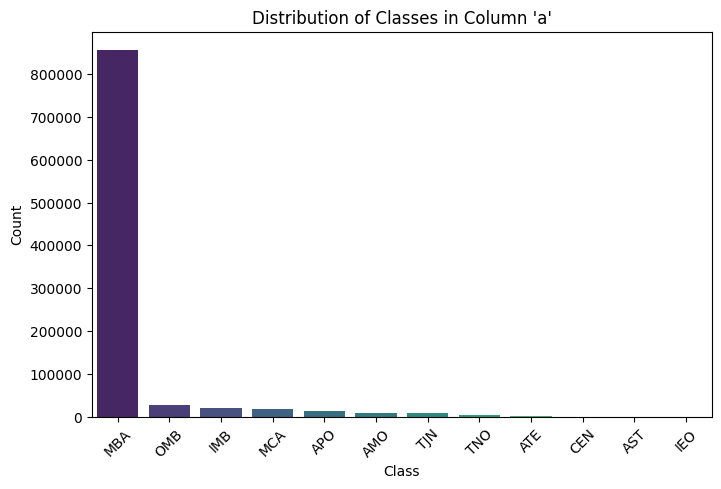

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='class', data=asteroid1, palette='viridis', order=asteroid1['class'].value_counts().index)

plt.title("Distribution of Classes in Column 'a'")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [11]:
asteroid2=asteroid1

In [12]:
classes_to_drop = ['CEN', 'AST', 'IEO', 'ATE']
df_filtered = asteroid2[~asteroid2['class'].isin(classes_to_drop)]

df_mba_reduced = df_filtered[df_filtered['class'] == 'MBA'].sample(n=30000, random_state=42)

df_others = df_filtered[df_filtered['class'] != 'MBA']

asteroid2 = pd.concat([df_mba_reduced, df_others], ignore_index=True)

print(asteroid2['class'].value_counts())

class
MBA    30000
OMB    28355
IMB    20360
MCA    18685
APO    12687
AMO     8457
TJN     8221
TNO     3467
Name: count, dtype: int64


In [13]:
asteroid2.drop(columns=['e'], inplace=True)
asteroid2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130232 entries, 0 to 130231
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   neo     130232 non-null  int64  
 1   pha     130232 non-null  int64  
 2   H       130232 non-null  float64
 3   a       130232 non-null  float64
 4   q       130232 non-null  float64
 5   i       130232 non-null  float64
 6   om      130232 non-null  float64
 7   w       130232 non-null  float64
 8   ma      130232 non-null  float64
 9   ad      130232 non-null  float64
 10  n       130232 non-null  float64
 11  tp      130232 non-null  float64
 12  per     130232 non-null  float64
 13  per_y   130232 non-null  float64
 14  moid    130232 non-null  float64
 15  class   130232 non-null  object 
 16  rms     130232 non-null  float64
 17  e_sqrt  130232 non-null  float64
dtypes: float64(15), int64(2), object(1)
memory usage: 17.9+ MB


C:\Users\priya\AppData\Local\Temp\ipykernel_48548\3382255880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=asteroid2, palette='viridis', order=asteroid2['class'].value_counts().index)


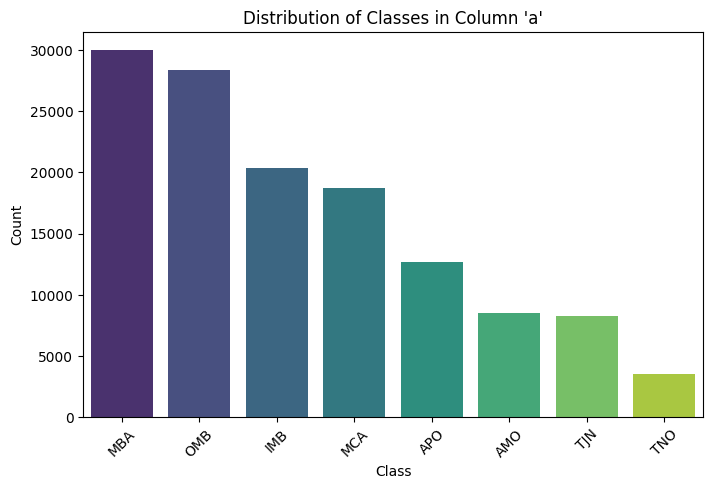

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='class', data=asteroid2, palette='viridis', order=asteroid2['class'].value_counts().index)

plt.title("Distribution of Classes in Column 'a'")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = asteroid2.drop('class', axis=1)
y = asteroid2['class']

y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 130232 entries, 0 to 130231
Series name: class
Non-Null Count   Dtype 
--------------   ----- 
130232 non-null  object
dtypes: object(1)
memory usage: 1017.6+ KB


In [16]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [18]:
# Model 1
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_val_1 = lr.predict(X_val_scaled)

print("Validation Accuracy:", accuracy_score(y_val, y_pred_val_1))
print("\nClassification Report:\n", classification_report(y_val, y_pred_val_1))

Validation Accuracy: 0.9638159578279338

Classification Report:
               precision    recall  f1-score   support

         AMO       0.95      0.95      0.95      1269
         APO       0.97      0.96      0.97      1904
         IMB       0.97      0.99      0.98      3055
         MBA       1.00      0.91      0.95      4501
         MCA       0.96      0.96      0.96      2803
         OMB       0.92      1.00      0.96      4254
         TJN       1.00      1.00      1.00      1233
         TNO       1.00      1.00      1.00       520

    accuracy                           0.96     19539
   macro avg       0.97      0.97      0.97     19539
weighted avg       0.97      0.96      0.96     19539



In [22]:
# Model 2
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_val_2 = rf.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred_val_2))
print("\nClassification Report:\n", classification_report(y_val, y_pred_val_2))

Validation Accuracy: 0.9998976406162035

Classification Report:
               precision    recall  f1-score   support

         AMO       1.00      1.00      1.00      1269
         APO       1.00      1.00      1.00      1904
         IMB       1.00      1.00      1.00      3055
         MBA       1.00      1.00      1.00      4501
         MCA       1.00      1.00      1.00      2803
         OMB       1.00      1.00      1.00      4254
         TJN       1.00      1.00      1.00      1233
         TNO       1.00      1.00      1.00       520

    accuracy                           1.00     19539
   macro avg       1.00      1.00      1.00     19539
weighted avg       1.00      1.00      1.00     19539



In [22]:
%pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
    --------------------------------------- 1.0/72.0 MB 8.5 MB/s eta 0:00:09
   - -------------------------------------- 2.9/72.0 MB 8.9 MB/s eta 0:00:08
   -- ------------------------------------- 4.7/72.0 MB 9.2 MB/s eta 0:00:08
   --- ------------------------------------ 6.8/72.0 MB 9.1 MB/s eta 0:00:08
   ---- ----------------------------------- 8.4/72.0 MB 9.0 MB/s eta 0:00:08
   ----- ---------------------------------- 10.2/72.0 MB 8.9 MB/s eta 0:00:07
   ------ --------------------------------- 12.1/72.0 MB 8.8 MB/s eta 0:00:07
   ------- -------------------------------- 13.6/72.0 MB 8.6 MB/s eta 0:00:07
   -------- ------------------------------- 15.5/72.0 MB 8.7 MB/s eta 0:00:07
   --------- ------------------------------ 17.3/72.0 MB 8.8 MB/s eta 0:00:07
   ---------- ----------------------------- 19.4/72.0 MB 8.8 MB/s eta 0:00:06
   ----------- ---------------------------- 21.2/72.0 MB 8.8 MB/s eta 0:00:06


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
# Model 3
# XGBoost Classifier


from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train_encoded)
y_pred_val_3 = xgb.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val_encoded, y_pred_val_3))
print("\nClassification Report:\n", classification_report(y_val_encoded, y_pred_val_3))

Validation Accuracy: 0.9982598904754594

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1269
           1       0.99      1.00      1.00      1904
           2       1.00      1.00      1.00      3055
           3       1.00      1.00      1.00      4501
           4       1.00      1.00      1.00      2803
           5       1.00      1.00      1.00      4254
           6       1.00      1.00      1.00      1233
           7       1.00      1.00      1.00       520

    accuracy                           1.00     19539
   macro avg       1.00      1.00      1.00     19539
weighted avg       1.00      1.00      1.00     19539



In [24]:
# Model 4
# SVC 

from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=10, gamma='scale', probability=True)
svm.fit(X_train_scaled, y_train)
y_pred_val_4 = svm.predict(X_val_scaled)

print("Validation Accuracy:", accuracy_score(y_val, y_pred_val_4))
print("\nClassification Report:\n", classification_report(y_val, y_pred_val_4))

Validation Accuracy: 0.9819335687599161

Classification Report:
               precision    recall  f1-score   support

         AMO       0.98      0.97      0.97      1269
         APO       0.98      0.98      0.98      1904
         IMB       0.99      1.00      0.99      3055
         MBA       1.00      0.95      0.97      4501
         MCA       0.98      0.99      0.98      2803
         OMB       0.96      1.00      0.98      4254
         TJN       1.00      1.00      1.00      1233
         TNO       1.00      1.00      1.00       520

    accuracy                           0.98     19539
   macro avg       0.99      0.99      0.99     19539
weighted avg       0.98      0.98      0.98     19539



In [ ]:
best_model=rf
y_pred_test = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Test Accuracy: 0.999948809828513
              precision    recall  f1-score   support

         AMO       1.00      1.00      1.00      1269
         APO       1.00      1.00      1.00      1903
         IMB       1.00      1.00      1.00      3054
         MBA       1.00      1.00      1.00      4500
         MCA       1.00      1.00      1.00      2803
         OMB       1.00      1.00      1.00      4253
         TJN       1.00      1.00      1.00      1233
         TNO       1.00      1.00      1.00       520

    accuracy                           1.00     19535
   macro avg       1.00      1.00      1.00     19535
weighted avg       1.00      1.00      1.00     19535



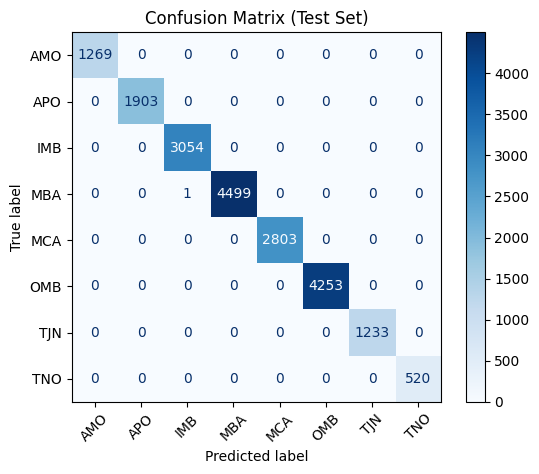

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_test = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test, labels=best_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix (Test Set)")
plt.show()


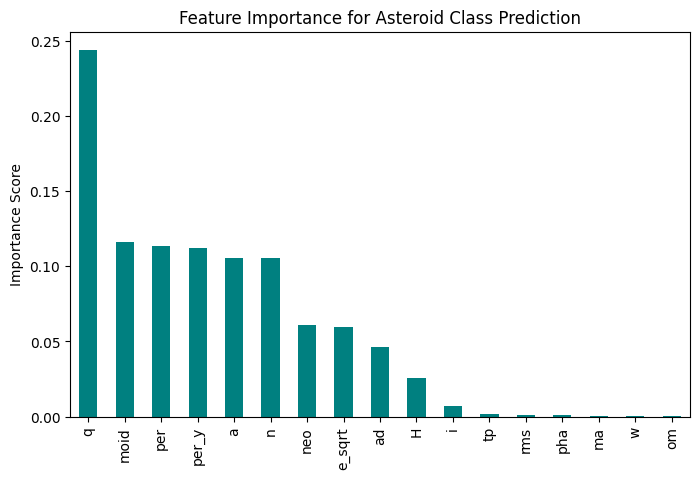

In [22]:
importances = rf.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

feat_imp.plot(kind='bar', figsize=(8,5), color='teal')
plt.title("Feature Importance for Asteroid Class Prediction")
plt.ylabel("Importance Score")
plt.show()

In [ ]:
import pickle

model_filename = 'asteroidpredictormodel.pkl'

# Save the model
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model saved to {model_filename}")



Model saved to asteroidpredictormodel.pkl
